In [1]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)

model.save('digits.model')



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 13s 213us/sample - loss: 0.2627 - acc: 0.9228
Epoch 2/3
60000/60000 [==============================] - 12s 200us/sample - loss: 0.1066 - acc: 0.9668
Epoch 3/3
10000/10000 [==============================] - 1s 132us/sample - loss: 0.1001 - acc: 0.9688
0.96880007
0.10011507653528824


this is probably:3


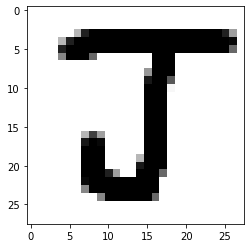

this is probably:2


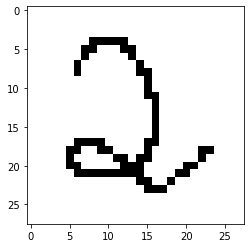

this is probably:3


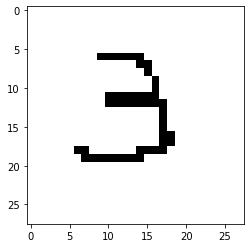

this is probably:3


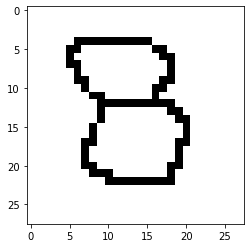

this is probably:5


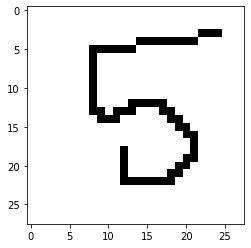

In [2]:
for i in range(1,6):
    img = cv.imread(f'{i}.png')[:, :, 0]
    img = np.invert(np.array([img]))
    p = model.predict(img)
    print(f'this is probably:{np.argmax(p)}')
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()